In [1]:
! pip install seaborn
! pip install plotly
! pip install ggplot
! pip install matplotlib

In [2]:
import warnings
warnings.simplefilter('ignore')

%pylab inline

%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
df = pd.read_csv('tmdb_5000_movies.csv')
print(df.shape)

(4803, 20)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [20]:
df = df.dropna()
print(df.shape)

(1493, 20)


In [21]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Функция `hist` из `matplotlib`**.

Посмотрим на распределение продолжительности фильмов.

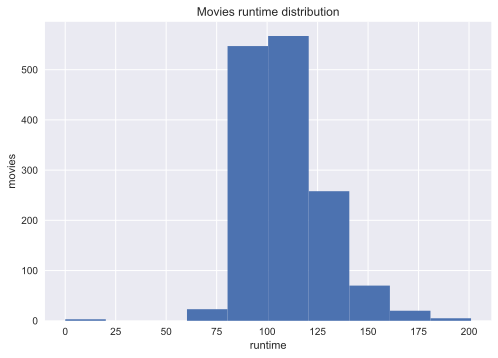

In [29]:
ax = df.runtime.hist()
ax.set_title('Movies runtime distribution')
ax.set_xlabel('runtime')
ax.set_ylabel('movies')

Посмотрим в каком году был максимальный общий доход.

In [101]:
year_revenue = df.groupby('year')[['revenue']].sum().sort_values('revenue', ascending=False)
year_revenue.head(12).style.bar()

,revenue
year,
2015,19206879920
2011,18945790172
2012,18646674636
2009,18056153109
2010,17953160683
2014,17029844753
2013,15880390438
2007,13343697978
2016,12344555883


**Pairplot из seaborn**.

Посмотрим на связь дохода и средней оценки.

In [30]:
import seaborn as sns

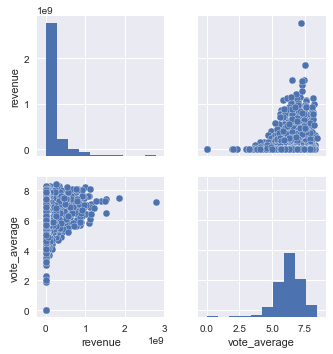

In [32]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(df[['revenue', 'vote_average']])

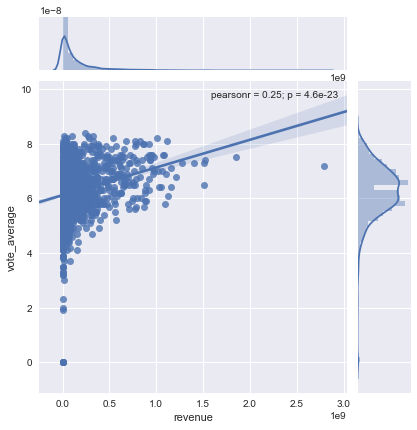

In [102]:
sns.jointplot(x='revenue', y='vote_average', data=df, kind='reg');

**Объект Figure из plotly**.

Посмотрим на кол-во выпущенных фильмов по годам.

In [35]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [39]:
from datetime import datetime

In [66]:
years = [datetime.strptime(release_date,"%Y-%m-%d" ).year for release_date in df['release_date']]
years

[2009,
 2007,
 2015,
 2012,
 2012,
 2007,
 2010,
 2015,
 2009,
 2016,
 2008,
 2006,
 2013,
 2013,
 2012,
 2011,
 2012,
 2014,
 2012,
 2010,
 2013,
 2007,
 1997,
 2016,
 2015,
 2012,
 2004,
 2013,
 2010,
 2009,
 2014,
 2013,
 2014,
 2010,
 2011,
 2011,
 2010,
 2009,
 2015,
 2013,
 2014,
 2013,
 2010,
 2013,
 2011,
 2008,
 2015,
 2012,
 2008,
 2009,
 2009,
 2015,
 2016,
 2016,
 2008,
 2009,
 2008,
 2011,
 2008,
 2016,
 2007,
 2014,
 2009,
 2015,
 2010,
 2012,
 2014,
 2014,
 2014,
 2010,
 2015,
 2014,
 2012,
 2016,
 2010,
 2014,
 2014,
 2010,
 2012,
 2008,
 2011,
 2015,
 2010,
 2006,
 2016,
 2007,
 2016,
 2015,
 2007,
 2007,
 2005,
 2008,
 2007,
 2005,
 2007,
 2005,
 2008,
 2009,
 2009,
 2013,
 2013,
 2015,
 2011,
 2008,
 2009,
 2012,
 2012,
 2015,
 2010,
 2007,
 2011,
 2010,
 2006,
 2011,
 2006,
 2002,
 2016,
 2002,
 2007,
 2016,
 2011,
 2012,
 2005,
 2014,
 2002,
 2014,
 2009,
 2011,
 1999,
 2003,
 2011,
 2016,
 2015,
 2013,
 2011,
 2007,
 2008,
 2015,
 2013,
 2015,
 2010,
 2014,
 2011,

In [67]:
d = dict((year, years.count(year)) for year in set(years) if years.count(year) > 1)

In [68]:
from collections import OrderedDict
d1 = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
d1

OrderedDict([(1964, 2),
             (1971, 2),
             (1973, 2),
             (1975, 2),
             (1977, 2),
             (1978, 3),
             (1979, 3),
             (1980, 3),
             (1981, 5),
             (1982, 3),
             (1983, 4),
             (1984, 2),
             (1985, 3),
             (1987, 2),
             (1988, 3),
             (1989, 4),
             (1990, 5),
             (1992, 3),
             (1993, 3),
             (1994, 5),
             (1995, 5),
             (1996, 11),
             (1997, 10),
             (1998, 12),
             (1999, 24),
             (2000, 19),
             (2001, 19),
             (2002, 35),
             (2003, 33),
             (2004, 45),
             (2005, 55),
             (2006, 81),
             (2007, 91),
             (2008, 107),
             (2009, 135),
             (2010, 150),
             (2011, 156),
             (2012, 110),
             (2013, 90),
             (2014, 70),
             (20

In [87]:
trace = go.Scatter(
    x=list(d1.keys()),
    y=list(d1.values()),
    name='Number of released films'
)

data = [trace]
layout = {'title': 'Statistics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [88]:
df['year'] = years

In [89]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012
